Minimum pixel intensity: 0.0
Maximum pixel intensity: 255.0


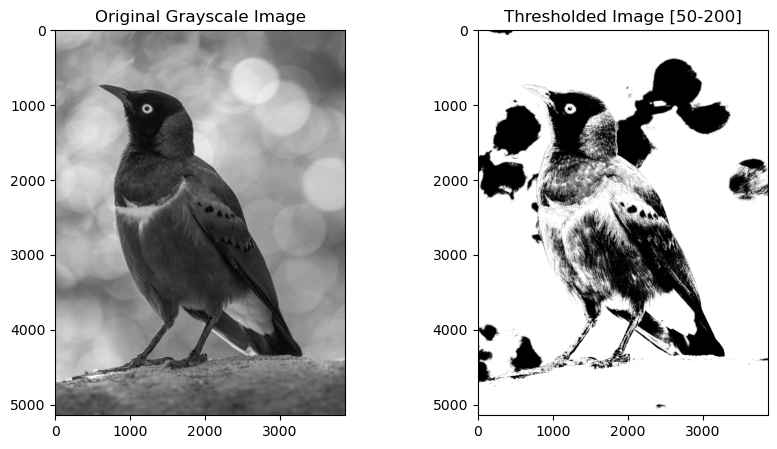

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('bi.jpg')

# Step 2: Convert the image to grayscale (if it's not already grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Find the minimum and maximum pixel intensity values
min_val, max_val, _, _ = cv2.minMaxLoc(gray_image)
print(f"Minimum pixel intensity: {min_val}")
print(f"Maximum pixel intensity: {max_val}")

# Step 4: Apply manual threshold (you can change the threshold values)
threshold_min = 50  # Set your own minimum threshold value
threshold_max = 200  # Set your own maximum threshold value

# Apply thresholding
_, binary_image = cv2.threshold(gray_image, threshold_min, 255, cv2.THRESH_BINARY)
_, binary_max = cv2.threshold(gray_image, threshold_max, 255, cv2.THRESH_BINARY_INV)

# Combine the two thresholds
thresholded_image = cv2.bitwise_and(binary_image, binary_max)

# Step 5: Display the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Thresholded Image [{threshold_min}-{threshold_max}]')
plt.imshow(thresholded_image, cmap='gray')

plt.show()


In [29]:
#rgb histogram

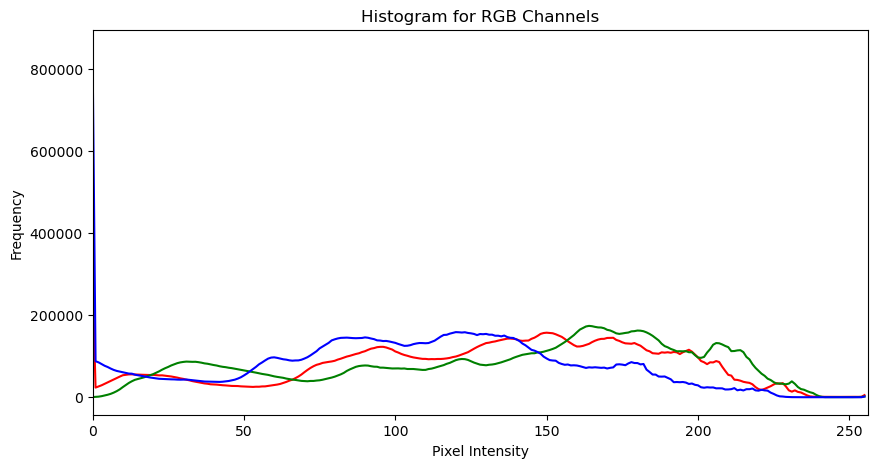

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image using OpenCV
image_path = 'bi.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR (OpenCV default) to RGB for proper plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Function to calculate and plot histogram
    def plot_histogram(image):
        color = ('r', 'g', 'b')  # Colors for each channel (Red, Green, Blue)
        plt.figure(figsize=(10, 5))

        # Calculate and plot histogram for each color channel
        for i, col in enumerate(color):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
            plt.xlim([0, 256])
        
        plt.title('Histogram for RGB Channels')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()

    # Plot the histogram for the loaded image
    plot_histogram(image_rgb)


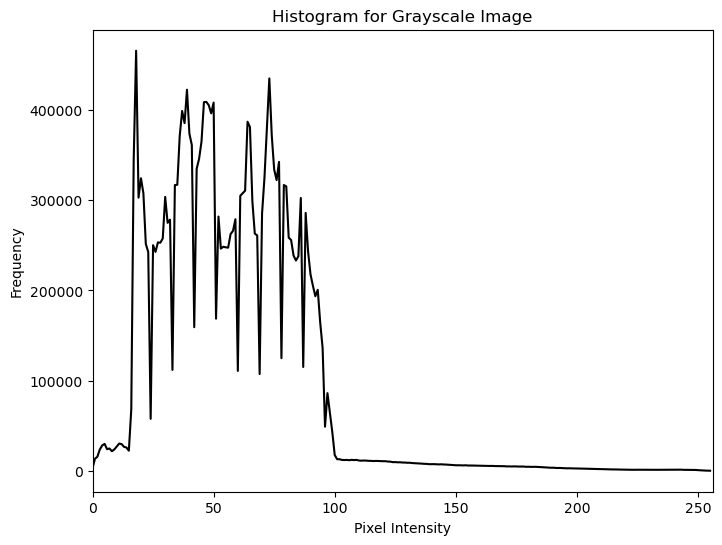

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load an image using OpenCV
image_path = 'b.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Function to calculate and plot histogram for grayscale image
    def plot_histogram_gray(image):
        # Calculate the histogram for the grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])

        # Plot the histogram
        plt.figure(figsize=(8, 6))
        plt.plot(hist, color='black')
        plt.xlim([0, 256])
        plt.title('Histogram for Grayscale Image')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()

    # Plot the histogram for the grayscale image
    plot_histogram_gray(gray_image)


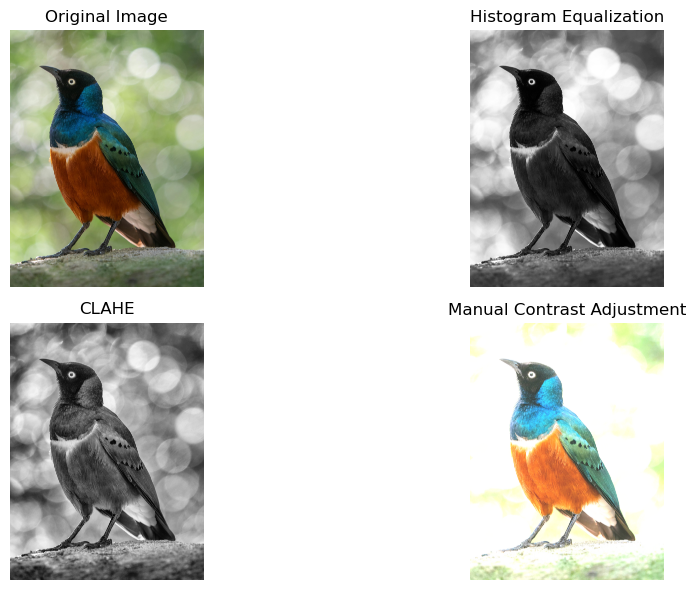

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image using OpenCV
image_path = 'bi.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert the image to grayscale for histogram equalization
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 1. Contrast Enhancement using Histogram Equalization
    def enhance_contrast_histogram_equalization(gray_image):
        hist_eq_image = cv2.equalizeHist(gray_image)
        return hist_eq_image

    # 2. Contrast Enhancement using CLAHE
    def enhance_contrast_clahe(gray_image, clip_limit=2.0, tile_grid_size=(8, 8)):
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        clahe_image = clahe.apply(gray_image)
        return clahe_image

    # 3. Manual Contrast Adjustment (linear scaling)
    def adjust_contrast_manually(image, alpha=1.5, beta=0):
        # Alpha: Contrast control (1.0-3.0), Beta: Brightness control (0-100)
        adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
        return adjusted_image

    # Perform contrast enhancement
    hist_eq_image = enhance_contrast_histogram_equalization(gray_image)
    clahe_image = enhance_contrast_clahe(gray_image)
    manually_adjusted_image = adjust_contrast_manually(image, alpha=2.0, beta=50)  # Increasing contrast and brightness

    # Display the original and contrast-enhanced images
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(hist_eq_image, cmap='gray')
    plt.title('Histogram Equalization')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(clahe_image, cmap='gray')
    plt.title('CLAHE')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(manually_adjusted_image, cv2.COLOR_BGR2RGB))
    plt.title('Manual Contrast Adjustment')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


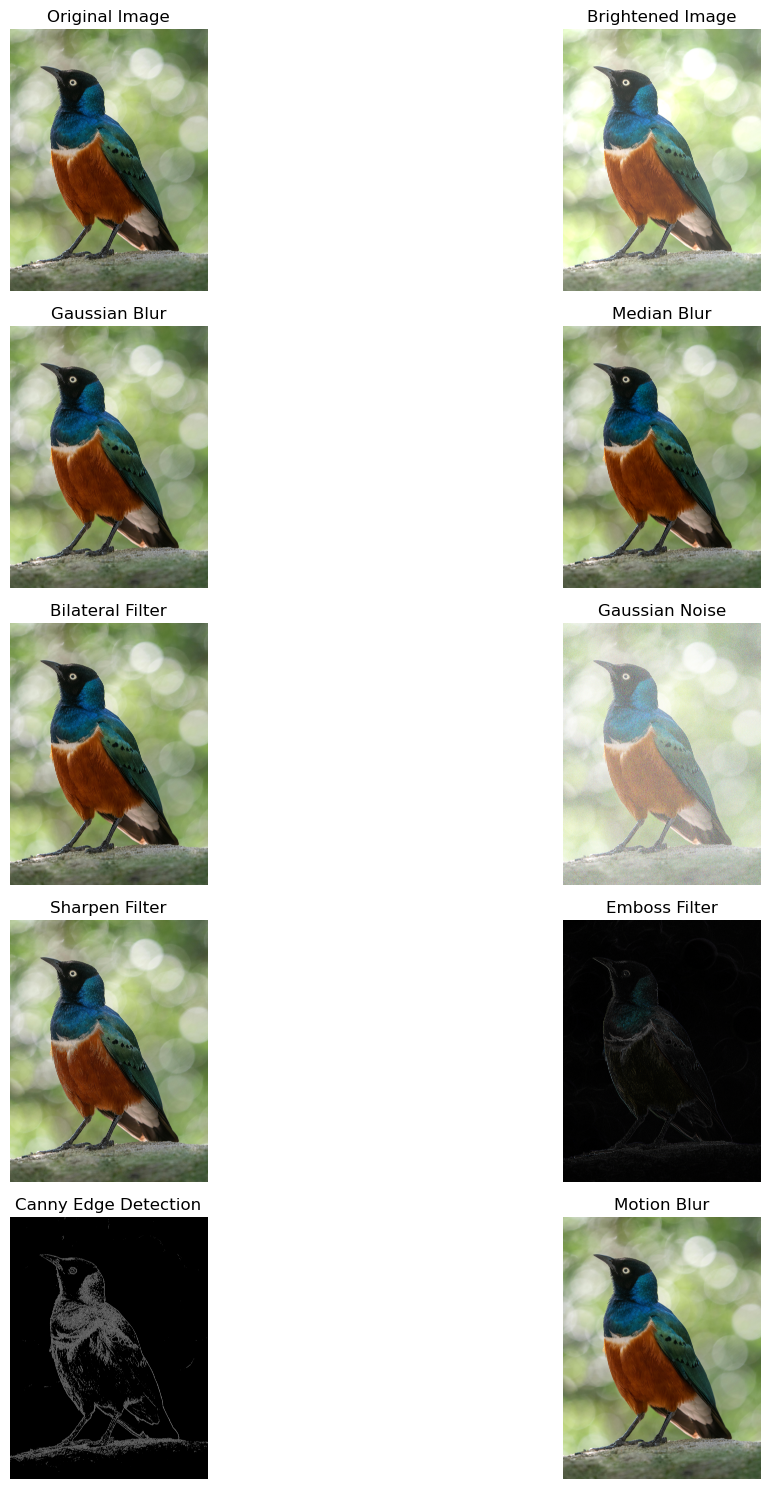

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'bi.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert image to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 1. Brightening (increase pixel intensity)
    def adjust_brightness(image, value=50):
        bright_image = cv2.convertScaleAbs(image, beta=value)
        return bright_image
    
    # 2. Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(image_rgb, (11, 11), 0)
    
    # 3. Median Blur
    median_blur = cv2.medianBlur(image_rgb, 11)
    
    # 4. Bilateral Filter
    bilateral_filter = cv2.bilateralFilter(image_rgb, 9, 75, 75)
    
    # 5. Add Gaussian Noise (to simulate noise in the image)
    def add_gaussian_noise(image):
        row, col, ch = image.shape
        mean = 0
        sigma = 25
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        gauss = gauss.reshape(row, col, ch).astype('uint8')
        noisy_image = cv2.add(image, gauss)
        return noisy_image

    # 6. Sharpen Filter (using a kernel)
    sharpen_kernel = np.array([[0,-1,0],
                               [-1,5,-1],
                               [0,-1,0]])
    sharpen = cv2.filter2D(image_rgb, -1, sharpen_kernel)
    
    # 7. Emboss Filter (using a kernel)
    emboss_kernel = np.array([[0,-1,-1],
                              [1,0,-1],
                              [1,1,0]])
    emboss = cv2.filter2D(image_rgb, -1, emboss_kernel)
    
    # 8. Edge Detection (Canny)
    edges = cv2.Canny(image_rgb, 100, 200)
    
    # 9. Motion Blur (using a kernel)
    kernel_motion_blur = np.zeros((15, 15))
    kernel_motion_blur[int((15 - 1) / 2), :] = np.ones(15)
    kernel_motion_blur = kernel_motion_blur / 15
    motion_blur = cv2.filter2D(image_rgb, -1, kernel_motion_blur)
    
    # 10. Grayscale Conversion
    grayscale = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

    # Plot the original and filtered images
    plt.figure(figsize=(15, 15))
    
    plt.subplot(5, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(5, 2, 2)
    plt.imshow(adjust_brightness(image_rgb, 50))
    plt.title('Brightened Image')
    plt.axis('off')

    plt.subplot(5, 2, 3)
    plt.imshow(gaussian_blur)
    plt.title('Gaussian Blur')
    plt.axis('off')

    plt.subplot(5, 2, 4)
    plt.imshow(median_blur)
    plt.title('Median Blur')
    plt.axis('off')

    plt.subplot(5, 2, 5)
    plt.imshow(bilateral_filter)
    plt.title('Bilateral Filter')
    plt.axis('off')

    plt.subplot(5, 2, 6)
    plt.imshow(add_gaussian_noise(image_rgb))
    plt.title('Gaussian Noise')
    plt.axis('off')

    plt.subplot(5, 2, 7)
    plt.imshow(sharpen)
    plt.title('Sharpen Filter')
    plt.axis('off')

    plt.subplot(5, 2, 8)
    plt.imshow(emboss)
    plt.title('Emboss Filter')
    plt.axis('off')

    plt.subplot(5, 2, 9)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.subplot(5, 2, 10)
    plt.imshow(motion_blur)
    plt.title('Motion Blur')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
#dimension

In [ ]:
pip install tensorflow

Image Dimensions: Width=3873, Height=5144, Channels=3
Image scaled to range [0, 1].
Image resized to 200x200.


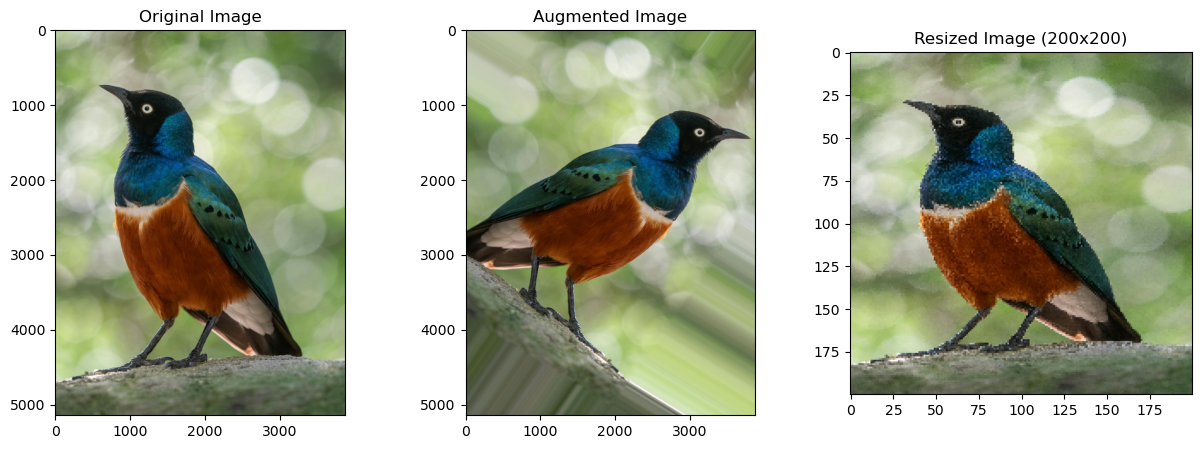

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to analyze image dimensions
def analyze_image(image):
    height, width, channels = image.shape
    print(f"Image Dimensions: Width={width}, Height={height}, Channels={channels}")
    return width, height, channels

# Function to apply image augmentations
def augment_image(image):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    image = np.expand_dims(image, 0)  # Reshape for data augmentation
    
    aug_iter = datagen.flow(image, batch_size=1)
    aug_image = next(aug_iter)[0].astype('uint8')
    
    return aug_image

# Function to scale pixel values
def scale_image(image):
    scaled_image = image / 255.0
    print(f"Image scaled to range [0, 1].")
    return scaled_image

# Function to resize image
def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    print(f"Image resized to {width}x{height}.")
    return resized_image

# Load an image using OpenCV
image_path = 'bi.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to RGB for displaying using matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 1. Analyze Image Dimensions
    analyze_image(image)

    # 2. Apply Image Augmentation
    augmented_image = augment_image(image)

    # 3. Scale Image
    scaled_image = scale_image(image)

    # 4. Resize Image to 200x200
    resized_image = resize_image(image, 200, 200)

    # Display the original, augmented, and resized images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image)
    
    plt.subplot(1, 3, 2)
    plt.title('Augmented Image')
    plt.imshow(augmented_image)
    
    plt.subplot(1, 3, 3)
    plt.title('Resized Image (200x200)')
    plt.imshow(resized_image)
    
    plt.show()

In [ ]:
#augumented images


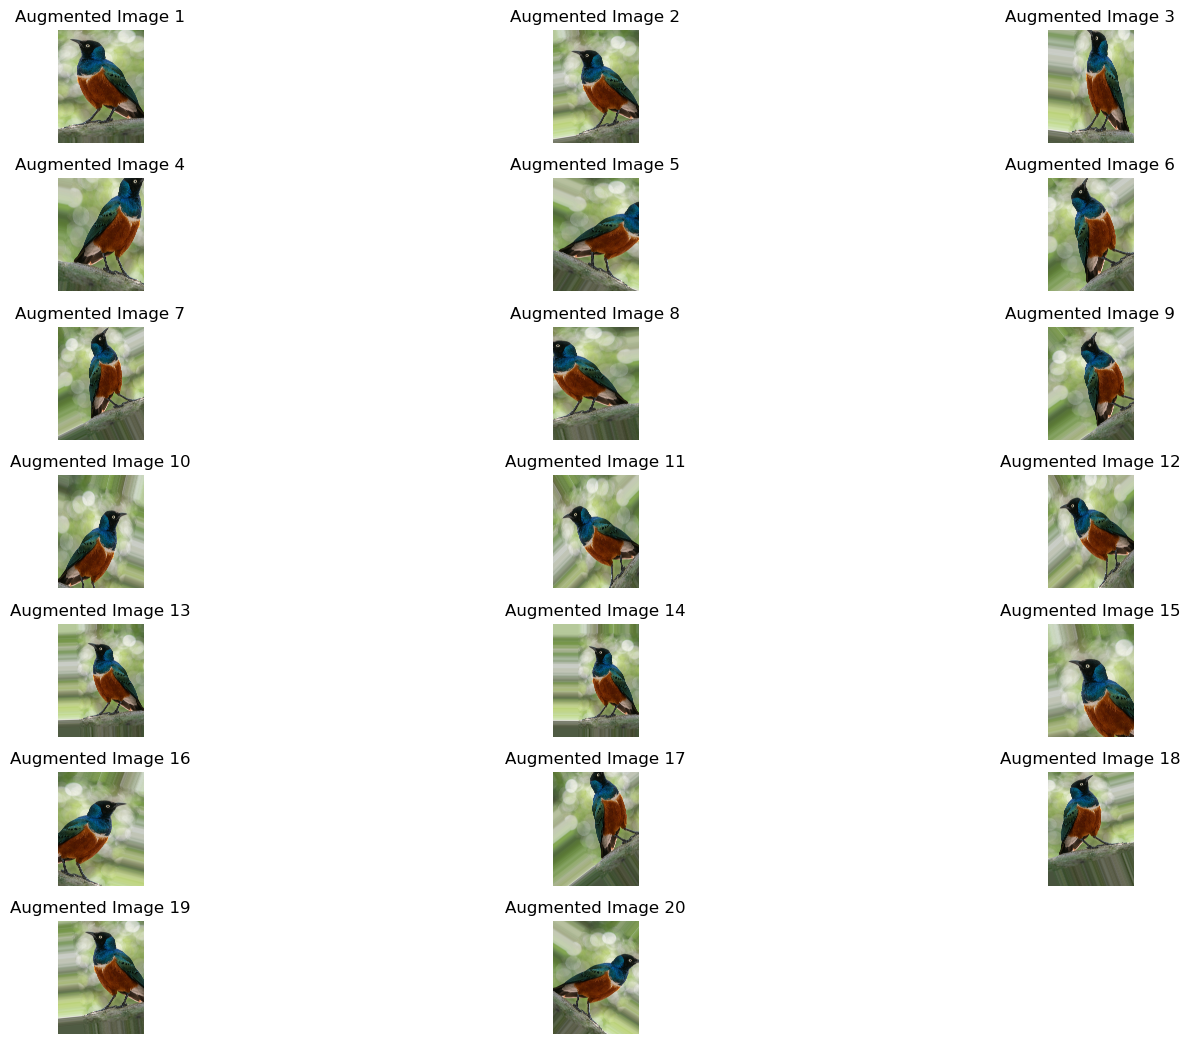

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to apply image augmentations and generate multiple augmented images
def augment_images(image, num_augmented_images):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Expand the image to add a batch dimension (required by ImageDataGenerator)
    image = np.expand_dims(image, 0)
    
    # Create an iterator to generate augmented images
    aug_iter = datagen.flow(image, batch_size=1)
    
    # Generate and display augmented images
    augmented_images = []
    for i in range(num_augmented_images):
        aug_image = next(aug_iter)[0].astype('uint8')  # Get the next augmented image
        augmented_images.append(aug_image)
    
    return augmented_images

# Load an image using OpenCV
image_path = 'bi.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to RGB for displaying using matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 1. Generate 10 augmented images
    num_augmented_images = 20
    augmented_images = augment_images(image, num_augmented_images)

    # 2. Display the augmented images
    plt.figure(figsize=(15, 15))
    
    for i in range(num_augmented_images):
        plt.subplot(10, 3, i + 1)  # 5 rows, 2 columns layout
        plt.imshow(augmented_images[i])
        plt.title(f'Augmented Image {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

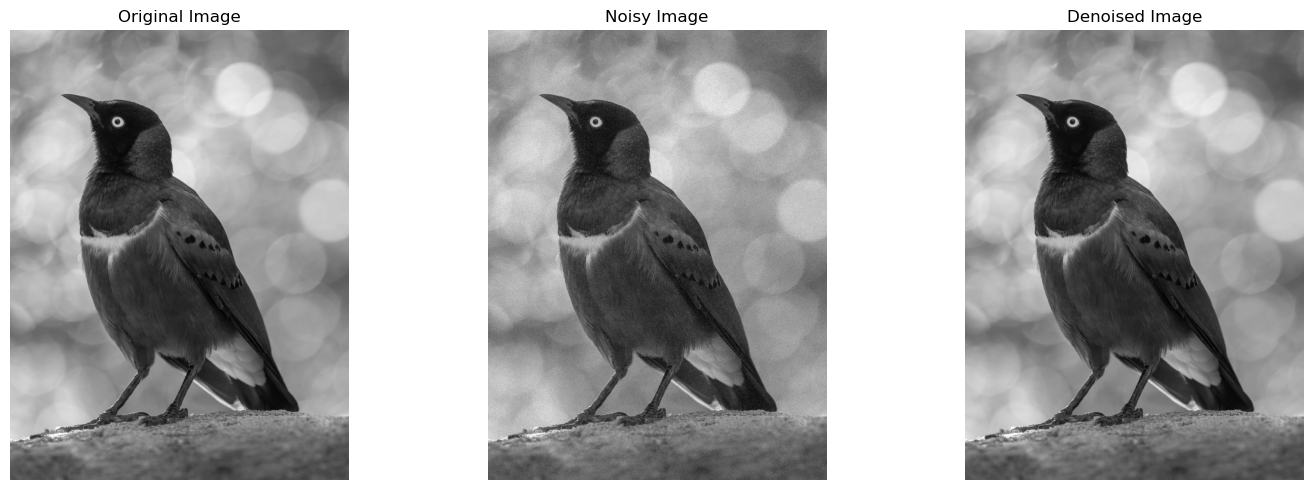

In [21]:
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, amount=0.05):
    np_image = np.array(image)
    row, col = np_image.shape
    num_salt = np.ceil(amount * row * col)
    num_pepper = np.ceil(amount * row * col)

    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in np_image.shape]
    np_image[coords[0], coords[1]] = 255

    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in np_image.shape]
    np_image[coords[0], coords[1]] = 0

    return Image.fromarray(np_image)

# Function to remove noise using median filter
def remove_noise(image):
    return image.filter(ImageFilter.MedianFilter(size=3))

# Load the image
image_path = 'bi.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Add noise to the image
noisy_image = add_salt_and_pepper_noise(image)

# Remove noise from the image
denoised_image = remove_noise(noisy_image)

# Display the original, noisy, and denoised images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Original Image', 'Noisy Image', 'Denoised Image']

for ax, img, title in zip(axes, [image, noisy_image, denoised_image], titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()